In [551]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time
def kfilter(array):
  if type(array)==str:
        array=eval(array)
  measurements = np.array(array)
  kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=measurements[0],
                  initial_state_covariance=1,
                  observation_covariance=30,
                  transition_covariance=1) 
  state_means, state_covariances = kf.filter(measurements) 
  state_means=list(state_means)
  for i in range(len(state_means)):
    state_means[i]=state_means[i][0]
  return state_means

In [506]:
import pandas as pd
import os
df = pd.read_csv('dataset_train.csv',sep=';')
def dfdel(value):
    return len(eval(value))
print(len(df))
df = df[df['Data'].map(dfdel)== 240]
print(len(df))

31383
31382


In [507]:
df.head()

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2


In [508]:
names = df['Filename'].unique()

In [509]:
person = df[df['Filename']==names[3]]

In [510]:
test = person['Test_index'].unique()

In [511]:
personTest = person[person['Test_index']==test[0]]
Presentation = personTest['Presentation'].unique()

In [512]:
data = personTest[personTest['Presentation']==Presentation[0]]

In [513]:
def MinMax(array):
    init = array[0]
    return max(max(array)-init,init-min(array))
def std(array):
    return np.std(array)
def MinMax2(array):
    return max(array)-min(array)
def Normolizate(array):
    init = array[0]
    for i in range(len(array)):
            array[i]=array[i]-init
    return array

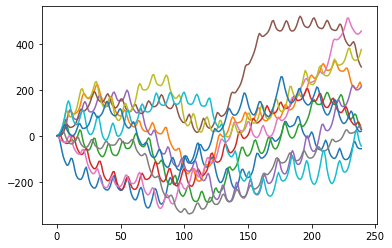

In [552]:
wigth = []
Data=[]
Data2 = []
for i in range(len(data)):
    q = kfilter(data.iloc[i]['Data'])
    Data.append(Normolizate(q))
    q2 = kfilter(data.iloc[i]['Data_2'])
    Data2.append(Normolizate(q2))
    plt.plot(q)
    wigth.append(MinMax(q))
plt.show()

In [553]:
data

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
2567,c856d82f-917e-461c-a91f-5298926b8b31,0,3,3,"[-193, -217, -201, -160, -143, -115, -71, -31,...","[1128, 1296, 1195, 951, 847, 705, 473, 230, -2...",2
16778,c856d82f-917e-461c-a91f-5298926b8b31,0,3,1,"[33, 60, 70, 94, 132, 181, 224, 156, -37, -84,...","[-223, -439, -539, -683, -916, -1223, -1488, -...",2
18230,c856d82f-917e-461c-a91f-5298926b8b31,0,3,9,"[-49, -11, 1, -94, -167, -144, -105, -95, -91,...","[31, -141, -177, 385, 848, 707, 477, 445, 481,...",2
18449,c856d82f-917e-461c-a91f-5298926b8b31,0,3,5,"[-156, -180, -147, -120, -109, -86, -51, -9, 3...","[459, 609, 417, 286, 256, 170, 8, -209, -431, ...",1
23601,c856d82f-917e-461c-a91f-5298926b8b31,0,3,2,"[-423, -418, -416, -406, -388, -356, -323, -30...","[1204, 1128, 1115, 1084, 986, 809, 621, 524, 7...",1
23933,c856d82f-917e-461c-a91f-5298926b8b31,0,3,11,"[-29, -105, -122, -100, -84, -77, -72, -47, 1,...","[-698, -171, -90, -316, -471, -522, -543, -680...",1
24605,c856d82f-917e-461c-a91f-5298926b8b31,0,3,10,"[71, 92, 117, 143, 153, 106, 2, -24, -10, 4, 6...","[-450, -581, -767, -955, -1051, -829, -350, -3...",1
24949,c856d82f-917e-461c-a91f-5298926b8b31,0,3,4,"[-276, -255, -230, -189, -142, -89, -40, -24, ...","[1426, 1314, 1174, 941, 650, 333, 61, -40, 602...",2
25215,c856d82f-917e-461c-a91f-5298926b8b31,0,3,0,"[-158, -109, -63, -50, -20, 19, 61, 107, 139, ...","[484, 269, 104, 97, -15, -186, -386, -628, -79...",0


In [554]:
minIndx = wigth.index(min(wigth))
maxIndx = wigth.index(max(wigth))
print(minIndx)
print(maxIndx)

3
5


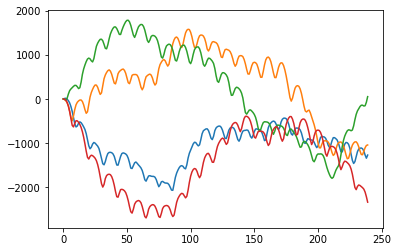

In [555]:
plt.plot(Data[1])
plt.plot(Data[2])
plt.plot(Data[3])
plt.plot(Data[8])

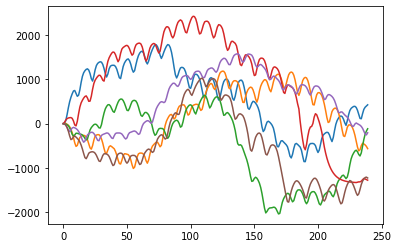

In [556]:
plt.plot(Data[0])
plt.plot(Data[4])
plt.plot(Data[5])
plt.plot(Data[6])
plt.plot(Data[7])
plt.plot(Data[10])

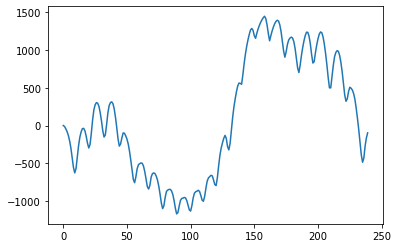

In [557]:
plt.plot(Data[9])

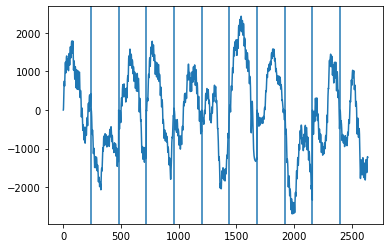

In [558]:
res = []
for i in Data2:
    for j in i:
        res.append(j)
plt.axvline(x=240)  
plt.axvline(x=480)
plt.axvline(x=480+240)
plt.axvline(x=240+240+480)
plt.axvline(x=240+240+480+240)
plt.axvline(x=240+240+480+240+240)
plt.axvline(x=240+240+480+240+480)
plt.axvline(x=240+240+480+240+480+240)
plt.axvline(x=240+240+480+240+480+240+240)
plt.axvline(x=240+240+480+240+480+240+480)
plt.plot(res)

In [542]:
def distance(array,_min,_max):
    x = MinMax2(array)-_min
    y = _max - MinMax2(array)
    return [x,y]

In [522]:
X=[]
Y = []
for i in range(len(data)):
    X.append(distance(kfilter(data.iloc[i]['Data']),wigth[minIndx],wigth[maxIndx]))
    Y.append(data.iloc[i]['Class_label'])

In [523]:
X[0]

[162.48923609392767, 122.03904568405318]

In [524]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [525]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1])

In [526]:
kmeans.cluster_centers_

array([[ 270.63334792,   13.89493386],
       [ 175.32396043,  109.20432135],
       [ 592.13876852, -307.61048674]])

In [527]:
l = kmeans.labels_
for i in range(len(Y)):
    print(str(Y[i])+str('/')+str(l[i]))

1/1
2/0
2/0
2/1
1/0
1/0
1/2
1/1
2/1
0/1
1/1


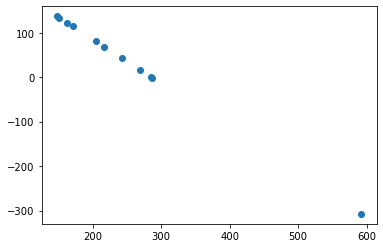

In [528]:
X=np.array(X)
plt.scatter(X[:,0],X[:,1])

In [529]:
tickers_scaled=Data

In [530]:
def castomKmeans(A,B):
    return min(min(A),min(b))

  0%|          | 0/9 [00:00<?, ?it/s]

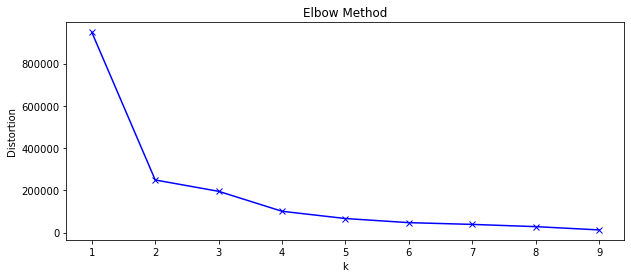

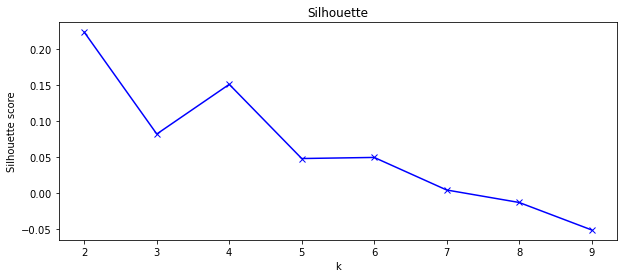

In [531]:
from tqdm.autonotebook import tqdm
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
distortions = []
silhouette = []

K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric='dtw', n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [532]:
n_clusters = 3
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_jobs=3)

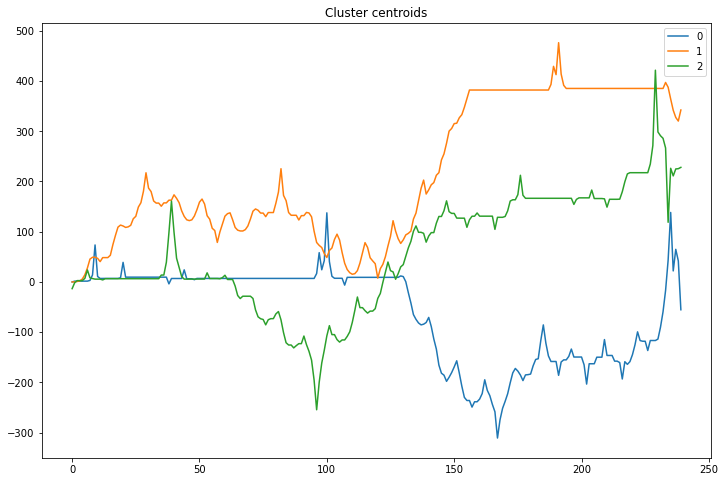

In [533]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [388]:
l = ts_kmeans.labels_
for i in range(len(Y)):
    print(str(Y[i])+str('/')+str(l[i]))

2/0
1/0
1/1
1/1
1/2
0/1
1/0
2/2
0/1
1/0
1/0
